In the age of streaming content, where more and more people are switching over from traditional cable TV to streaming platforms, we can sometimes feel like nothing stands out among the massive number of options we have to choose from. When it comes to finding a new TV series to watch, we often end up just scrolling through entire categories without being able to choose anything, and end up picking whatever has an interesting cover or a cool name (and it usually disappoints). I, like many, have experienced this multiple times. 

So I decided to take a more analytical approach to choosing my next show to watch, and found a dataset containing Episode and Series Ratings from IMDb's Top 250 TV Shows list. In this notebook, I will explore this data, answer some interesting questions, maybe confirm some things you know to be true without having seen the numbers, and eventually settle on a new show to start watching. You can, of course, just scroll to the bottom to find out what show I settled on, but there's some pretty cool stuff in between here and there that you might find interesting. My comments (gray colored font that follows #) in each cell are a plain english description of what I'm doing and what the output represents.

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The first dataset that I will look at contains individual episode ratings for each episode that is part of a show on IMDb's Top 250 TV Shows list. Each episode has its own rating ('Rating') which is calculated by averaging all of the ratings that were submitted on IMDb. Data also contains the season, episode, title, and a code for each title.

In [2]:
#read in data
imdb = pd.read_csv("imdb_top_250_series_episode_ratings.csv")
imdb.head()

,Season,Episode,Rating,Code,Title
0,1,1,9.4,tt5491994,Planet Earth II
1,1,2,9.1,tt5491994,Planet Earth II
2,1,3,8.9,tt5491994,Planet Earth II
3,1,4,8.8,tt5491994,Planet Earth II
4,1,5,8.7,tt5491994,Planet Earth II


## EDA (exploratory data analysis)

In [3]:
#check data types for each field
imdb.dtypes

Season       int64
Episode      int64
Rating     float64
Code        object
Title       object
dtype: object

In [4]:
#check shape of table
imdb.shape

(15339, 5)

In [5]:
#description of numerical variables
imdb.describe()

,Season,Episode,Rating
count,15339.000000,15339.000000,15339.000000
mean,4.774562,15.483604,8.059280
std,5.103163,27.888825,0.752739
min,1.000000,1.000000,2.200000
25%,1.000000,4.000000,7.700000
50%,3.000000,8.000000,8.100000
75%,6.000000,15.000000,8.500000
max,34.000000,291.000000,10.000000


In [6]:
imdb.isnull().sum()

Season     0
Episode    0
Rating     0
Code       0
Title      0
dtype: int64

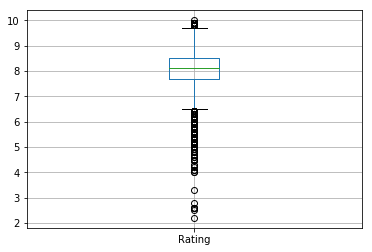

In [7]:
#boxplot shows distribution of all episode ratings
imdb.boxplot(column=['Rating'])
plt.show()

In [8]:
#get avg episode rating for each show
avg_rating = imdb.groupby(['Title']).mean()
avg_rating['Rating']

Title
1883                         8.600000
Adventure Time               8.015771
Africa                       8.450000
Alfred Hitchcock Presents    7.134328
Anne with an E               8.744444
                               ...   
Yellowstone                  8.384615
Yes Minister                 8.327273
Yes, Prime Minister          8.418750
Young Justice                8.916327
Your Lie in April            8.390909
Name: Rating, Length: 243, dtype: float64

In [9]:
#search for avg rating for a specific show
avg_rating.at['The Office', 'Rating']

8.106435643564362

In [10]:
#change 'Title' from index to a field and replace index
avg_rating.reset_index(inplace=True)

In [11]:
#print avg_rating dataframe
print(avg_rating)

                         Title    Season    Episode    Rating
0                         1883  1.000000   5.500000  8.600000
1               Adventure Time  5.125448  16.681004  8.015771
2                       Africa  1.000000   3.500000  8.450000
3    Alfred Hitchcock Presents  3.988806  19.656716  7.134328
4               Anne with an E  2.111111   5.111111  8.744444
..                         ...       ...        ...       ...
238                Yellowstone  2.538462   5.384615  8.384615
239               Yes Minister  2.045455   4.181818  8.327273
240        Yes, Prime Minister  1.500000   4.500000  8.418750
241              Young Justice  2.530612  12.887755  8.916327
242          Your Lie in April  1.000000  11.500000  8.390909

[243 rows x 4 columns]


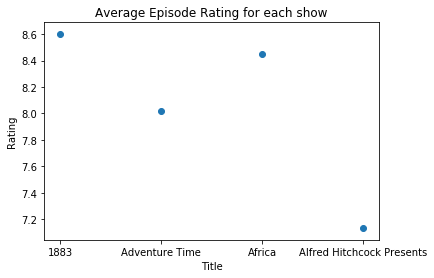

In [12]:
#plot avg episode rating for each show(scatter)
#use only the first 4 rows
ar = avg_rating.iloc[0:4]
plt.scatter(ar['Title'], ar['Rating'])
#label titles
plt.title('Average Episode Rating for each show')
plt.ylabel('Rating')
plt.xlabel('Title')
plt.show()

In [13]:
#get how many seasons each show had
tot_seasons = imdb.groupby(['Title']).max()
tot_seasons['Season']

Title
1883                          1
Adventure Time               10
Africa                        1
Alfred Hitchcock Presents     7
Anne with an E                3
                             ..
Yellowstone                   4
Yes Minister                  3
Yes, Prime Minister           2
Young Justice                 4
Your Lie in April             1
Name: Season, Length: 243, dtype: int64

In [14]:
#search for number of seasons for a specific show
tot_seasons.at['The Office', 'Season']

9

In [15]:
#change 'Title' from index to a field and replace index
tot_seasons.reset_index(inplace=True)

In [16]:
#look at tot_seasons df
print(tot_seasons)

                         Title  Season  Episode  Rating        Code
0                         1883       1       10     9.2  tt13991232
1               Adventure Time      10       52     9.7   tt1305826
2                       Africa       1        6     8.7   tt2571774
3    Alfred Hitchcock Presents       7       39     8.6   tt0047708
4               Anne with an E       3       10     9.5   tt5421602
..                         ...     ...      ...     ...         ...
238                Yellowstone       4       10     9.4   tt4236770
239               Yes Minister       3        8     9.1   tt0080306
240        Yes, Prime Minister       2        8     9.2   tt0086831
241              Young Justice       4       26     9.7   tt1641384
242          Your Lie in April       1       22     9.7   tt3895150

[243 rows x 5 columns]


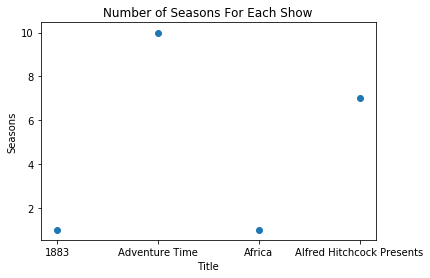

In [17]:
#plot total number of seasons for each show(scatter)
#use only the first 4 rows
ts = tot_seasons.iloc[0:4]
plt.scatter(ts['Title'], ts['Season'])
#labels
plt.title('Number of Seasons For Each Show')
plt.ylabel('Seasons')
plt.xlabel('Title')
plt.show()

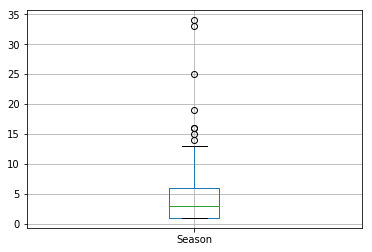

In [18]:
#boxplot shows distribution of # of seasons for each show
tot_seasons.boxplot(column=['Season'])
plt.show()

## Questions

### 1.) What are the top series by mean episode rating?

In [19]:
#show title and average episode rating calulated in EDA
avg_rating[['Title', 'Rating']].head()

,Title,Rating
0,1883,8.600000
1,Adventure Time,8.015771
2,Africa,8.450000
3,Alfred Hitchcock Presents,7.134328
4,Anne with an E,8.744444


In [20]:
#Top 10 Series based on Mean Episode Rating
avg_rating.sort_values(by='Rating', ascending=False).head(10)[['Title', 'Rating']]

,Title,Rating
35,Chernobyl,9.540000
10,Aspirants,9.260000
12,Attack on Titan,9.137931
184,The Beatles: Get Back,9.100000
202,The Last Dance,9.100000
6,Arcane,9.044444
15,Band of Brothers,9.040000
179,TVF Pitchers,9.040000
152,Ramayan,9.030769
160,Scam 1992: The Harshad Mehta Story,9.030000


### 2.) What are the top series by their median episode rating?

In [21]:
#get median episode rating for each show
median_rating = imdb.groupby(['Title']).median()
median_rating['Rating']

Title
1883                         8.70
Adventure Time               8.00
Africa                       8.45
Alfred Hitchcock Presents    7.10
Anne with an E               8.80
                             ... 
Yellowstone                  8.30
Yes Minister                 8.20
Yes, Prime Minister          8.40
Young Justice                8.90
Your Lie in April            8.20
Name: Rating, Length: 243, dtype: float64

In [22]:
#Top 10 Series based on Median Episode Rating
median_rating.sort_values(by='Rating', ascending=False).head(10)['Rating']

Title
Chernobyl           9.50
Aspirants           9.30
Arcane              9.20
Attack on Titan     9.20
Band of Brothers    9.05
The Last Dance      9.05
TVF Pitchers        9.00
Gullak              9.00
Our Planet          9.00
Ramayan             9.00
Name: Rating, dtype: float64

### 3.) What are the top seasons by their mean episode rating?

In [23]:
#groupby Title and Season to get mean episode rating for each season of each show
seasons = imdb.groupby(['Title', 'Season']).mean()
seasons.head()

Episode    Rating
Title          Season                   
1883           1           5.5  8.600000
Adventure Time 1          14.0  7.555556
               2          13.5  7.861538
               3          13.0  7.972000
               4          13.5  7.903846

In [24]:
#calculate mean of 1883 manually to double check that the calculation above was what I wanted
imdb[imdb['Title']== '1883'].mean()['Rating']

8.6

In [25]:
#Top 10 individual seasons based on Mean Episode Rating
#sort mean episode rating for each season by descending value and display the Rating (Title and season are indeces)
seasons.sort_values(by='Rating', ascending=False).head(10)['Rating']

Title            Season
Chernobyl        1         9.540000
Breaking Bad     5         9.375000
Attack on Titan  3         9.336364
Brass Eye        2         9.300000
Attack on Titan  4         9.289286
Samurai Jack     5         9.270000
Aspirants        1         9.260000
Game of Thrones  4         9.230000
True Detective   1         9.225000
Mr. Robot        4         9.215385
Name: Rating, dtype: float64

### 4.) What are the top seasons by their median episode rating?

In [26]:
#groupby Title and Season to get median episode rating for each season of each show
median_seasons = imdb.groupby(['Title', 'Season']).median()
median_seasons.head()

Episode  Rating
Title          Season                 
1883           1           5.5    8.70
Adventure Time 1          14.0    7.60
               2          13.5    7.75
               3          13.0    8.00
               4          13.5    7.95

In [27]:
#reset index
median_seasons.reset_index(inplace=True)

In [28]:
#print median_seasons df
print(median_seasons)

                  Title  Season  Episode  Rating
0                  1883       1      5.5    8.70
1        Adventure Time       1     14.0    7.60
2        Adventure Time       2     13.5    7.75
3        Adventure Time       3     13.0    8.00
4        Adventure Time       4     13.5    7.95
...                 ...     ...      ...     ...
1042      Young Justice       1     13.5    8.90
1043      Young Justice       2     10.5    9.10
1044      Young Justice       3     13.5    8.85
1045      Young Justice       4     13.5    8.90
1046  Your Lie in April       1     11.5    8.20

[1047 rows x 4 columns]


In [29]:
#Top 10 individual seasons based on Median Episode Rating
#sort mean episode rating for each season by descending value and display the Rating (Title and season are indeces)
median_seasons.sort_values(by='Rating', ascending=False).head(10)[['Title','Season','Rating']]

,Title,Season,Rating
126,Chernobyl,1,9.50
116,Breaking Bad,5,9.45
646,Sherlock,2,9.40
510,Only Fools and Horses,8,9.30
52,Attack on Titan,3,9.30
53,Attack on Titan,4,9.30
111,Brass Eye,2,9.30
143,Content Cop,3,9.30
318,Game of Thrones,4,9.30
45,Aspirants,1,9.30


### 5.) What are the most loved TV series endings?

In [30]:
#look at imdb df
imdb

,Season,Episode,Rating,Code,Title
0,1,1,9.4,tt5491994,Planet Earth II
1,1,2,9.1,tt5491994,Planet Earth II
2,1,3,8.9,tt5491994,Planet Earth II
3,1,4,8.8,tt5491994,Planet Earth II
4,1,5,8.7,tt5491994,Planet Earth II
...,...,...,...,...,...
15334,16,1,8.0,tt1230180,The Angry Video Game Nerd
15335,16,2,8.3,tt1230180,The Angry Video Game Nerd
15336,16,3,7.5,tt1230180,The Angry Video Game Nerd
15337,16,4,7.0,tt1230180,The Angry Video Game Nerd


In [31]:
#sort title and season in ascending order
a = imdb.sort_values(by=['Title','Season'], ascending=True)
a

,Season,Episode,Rating,Code,Title
5409,1,1,8.7,tt13991232,1883
5410,1,2,8.9,tt13991232,1883
5411,1,3,8.4,tt13991232,1883
5412,1,4,8.3,tt13991232,1883
5413,1,5,9.1,tt13991232,1883
...,...,...,...,...,...
13854,1,18,8.6,tt3895150,Your Lie in April
13855,1,19,8.2,tt3895150,Your Lie in April
13856,1,20,8.8,tt3895150,Your Lie in April
13857,1,21,9.0,tt3895150,Your Lie in April


In [32]:
#drop all title duplicates but keep the last row (last row is series finale after sorting in ascending order)
b = a.drop_duplicates('Title', keep='last').reset_index(drop=True)
b

,Season,Episode,Rating,Code,Title
0,1,10,9.0,tt13991232,1883
1,10,13,9.7,tt1305826,Adventure Time
2,1,6,8.2,tt2571774,Africa
3,7,39,7.1,tt0047708,Alfred Hitchcock Presents
4,3,10,9.5,tt5421602,Anne with an E
...,...,...,...,...,...
238,4,10,8.2,tt4236770,Yellowstone
239,3,8,9.1,tt0080306,Yes Minister
240,2,8,8.8,tt0086831,"Yes, Prime Minister"
241,4,26,9.1,tt1641384,Young Justice


In [33]:
#check to make sure that only entry for specific shows is actually the series finale
b[b['Title'] == 'The Office']

,Season,Episode,Rating,Code,Title
208,9,23,9.8,tt0386676,The Office


In [34]:
b[b['Title'] == 'Breaking Bad']

,Season,Episode,Rating,Code,Title
32,5,16,9.9,tt0903747,Breaking Bad


In [35]:
#Top 10 Series Finales
#sort Rating in descending and display results for series finale rating
finales = b.sort_values(by='Rating', ascending=False)[['Title', 'Season', 'Episode', 'Rating']]
finales.head(10)

,Title,Season,Episode,Rating
13,Avatar: The Last Airbender,3,21,9.9
32,Breaking Bad,5,16,9.9
38,Code Geass,2,25,9.9
167,Six Feet Under,5,12,9.9
230,Vinland Saga,1,24,9.9
35,Chernobyl,1,5,9.8
208,The Office,9,23,9.8
178,Succession,3,9,9.8
20,Better Call Saul,6,13,9.8
153,Regular Show,8,27,9.8


In [36]:
#Bottom 10 Series Finales
finales.tail(10)

,Title,Season,Episode,Rating
170,South Park,25,8,6.6
216,The Twilight Zone,5,36,6.5
164,Shameless,11,12,6.4
23,Black Mirror,5,3,6.1
114,Line of Duty,6,7,5.9
225,Top Gear,33,1,5.9
150,QI,19,16,5.5
57,Dexter,8,12,4.7
83,Game of Thrones,8,6,4.0
94,House of Cards,6,8,2.6


If you watched Game of Thrones, you might've expected it would be on list. I am glad to see it here because the finale was truly awful. This also ensures that I will never watch House of Cards.

### 6.) What are the most loved TV series pilots?

In [37]:
#find all the pilot episodes
pilot = imdb[(imdb['Season'] == 1) & (imdb['Episode'] == 1)]
pilot.head()

,Season,Episode,Rating,Code,Title
0,1,1,9.4,tt5491994,Planet Earth II
6,1,1,9.4,tt7366338,Chernobyl
11,1,1,7.1,tt6769208,Blue Planet II
19,1,1,8.6,tt0185906,Band of Brothers
29,1,1,9.1,tt2395695,Cosmos: A Spacetime Odyssey


In [38]:
#Top 10 Series Pilot Episodes
#sort pilot ratings in descending order
pilot = pilot.sort_values(by='Rating', ascending=False)[['Title', 'Season', 'Episode', 'Rating']]
pilot.head(10)

,Title,Season,Episode,Rating
0,Planet Earth II,1,1,9.4
6,Chernobyl,1,1,9.4
1278,Fargo,1,1,9.3
11507,Mr. Robot,1,1,9.2
6021,Aspirants,1,1,9.2
6548,This Is Us,1,1,9.2
6860,The Rehearsal,1,1,9.1
13347,The Night Of,1,1,9.1
29,Cosmos: A Spacetime Odyssey,1,1,9.1
1005,Attack on Titan,1,1,9.1


In [39]:
#Bottom 10 Pilot Episodes
pilot.tail(10)

,Title,Season,Episode,Rating
3164,BoJack Horseman,1,1,7.1
12102,Skam,1,1,7.1
8638,Top Gear,1,1,7.1
11,Blue Planet II,1,1,7.1
10993,The Venture Bros.,1,1,7.1
13267,Schitt's Creek,1,1,7.0
6693,Parks and Recreation,1,1,6.9
5782,Star Trek: The Next Generation,1,1,6.9
9433,Adventure Time,1,1,6.9
8304,Mystery Science Theater 3000,1,1,6.5


### 7.) What are the TV series that continously keep improving?

In [40]:
#get the unique series titles that have multiple seasons
t = imdb[imdb['Season'] > 1]['Title'].unique()
t

array(['Avatar: The Last Airbender', 'Breaking Bad', 'The Wire',
       'The Sopranos', 'Rick and Morty', 'Sherlock', 'Game of Thrones',
       'Batman: The Animated Series', 'The Twilight Zone',
       'True Detective', 'Attack on Titan', 'Fargo', 'Gravity Falls',
       'Better Call Saul', 'Nathan for You', 'Only Fools and Horses',
       'The Office', 'Seinfeld', "Monty Python's Flying Circus",
       'Fawlty Towers', 'Twin Peaks', 'Narcos', 'The West Wing',
       'Black Mirror', 'Leyla and Mecnun', 'Curb Your Enthusiasm',
       'Friends', 'Last Week Tonight with John Oliver', 'Succession',
       'Taskmaster', "Chappelle's Show", 'BoJack Horseman',
       "It's Always Sunny in Philadelphia", 'As If', 'Rome', 'Ted Lasso',
       'Kota Factory', 'The Mandalorian', 'Peaky Blinders', 'Dark',
       'Six Feet Under', 'Oz', 'One Punch Man', 'The Boys', 'Fleabag',
       'Arrested Development', 'Stranger Things', 'Battlestar Galactica',
       'Sarabhai V/S Sarabhai', 'Gullak', 'Downton

In [41]:
#filter main dataframe to contain only values that are in cell above(multiple seasons)
mult_seasons = imdb[imdb['Title'].isin(t)]
mult_seasons.head()

,Season,Episode,Rating,Code,Title
110,1,1,8.4,tt0417299,Avatar: The Last Airbender
111,1,2,7.9,tt0417299,Avatar: The Last Airbender
112,1,3,8.1,tt0417299,Avatar: The Last Airbender
113,1,4,8.4,tt0417299,Avatar: The Last Airbender
114,1,5,8.0,tt0417299,Avatar: The Last Airbender


In [42]:
#get average episode rating for each season
ms = mult_seasons.groupby(['Title', 'Season']).mean()
ms

Episode    Rating
Title               Season                   
Adventure Time      1          14.0  7.555556
                    2          13.5  7.861538
                    3          13.0  7.972000
                    4          13.5  7.903846
                    5          26.5  8.017308
...                             ...       ...
Yes, Prime Minister 2           4.5  8.275000
Young Justice       1          13.5  8.911538
                    2          10.5  9.120000
                    3          13.5  8.903846
                    4          13.5  8.776923

[969 rows x 2 columns]

In [43]:
#change 'Title' and 'Season' from index to a field and replace index
ms.reset_index(inplace=True)

In [44]:
print(ms)

                   Title  Season  Episode    Rating
0         Adventure Time       1     14.0  7.555556
1         Adventure Time       2     13.5  7.861538
2         Adventure Time       3     13.0  7.972000
3         Adventure Time       4     13.5  7.903846
4         Adventure Time       5     26.5  8.017308
..                   ...     ...      ...       ...
964  Yes, Prime Minister       2      4.5  8.275000
965        Young Justice       1     13.5  8.911538
966        Young Justice       2     10.5  9.120000
967        Young Justice       3     13.5  8.903846
968        Young Justice       4     13.5  8.776923

[969 rows x 4 columns]


In [45]:
#drop 'Episode' column
ms = ms[['Title', 'Season', 'Rating']]
ms

,Title,Season,Rating
0,Adventure Time,1,7.555556
1,Adventure Time,2,7.861538
2,Adventure Time,3,7.972000
3,Adventure Time,4,7.903846
4,Adventure Time,5,8.017308
...,...,...,...
964,"Yes, Prime Minister",2,8.275000
965,Young Justice,1,8.911538
966,Young Justice,2,9.120000
967,Young Justice,3,8.903846


In [46]:
#specific example of show that does not continously improve over the course of the show
ms[ms['Title'] == 'The Office']

,Title,Season,Rating
762,The Office,1,7.950000
763,The Office,2,8.328571
764,The Office,3,8.500000
765,The Office,4,8.414286
766,The Office,5,8.357692
767,The Office,6,8.050000
768,The Office,7,8.179167
769,The Office,8,7.420833
770,The Office,9,7.721739


In [47]:
#command to determine if avg episode rating is going up each season
ms[ms['Title'] == 'The Office']['Rating'].is_monotonic_increasing

False

In [48]:
#specific example of show that is continously improving over the course of the show
ms[ms['Title'] == "Schitt's Creek"]

,Title,Season,Rating
561,Schitt's Creek,1,7.500000
562,Schitt's Creek,2,7.869231
563,Schitt's Creek,3,7.938462
564,Schitt's Creek,4,8.176923
565,Schitt's Creek,5,8.192857
566,Schitt's Creek,6,8.314286


In [49]:
#command to determine if avg episode rating is going up each season
ms[ms['Title'] == "Schitt's Creek"]['Rating'].is_monotonic_increasing

True

In [50]:
##Series with multiple seasons that are continuously improving
#loop through each title with multiple seasons and return titles whos avg. episode rating goes up each season
for i in t:
    if (ms[ms['Title'] == i]['Rating'].is_monotonic_increasing) == True:
        print(i)

Avatar: The Last Airbender
Gravity Falls
Fawlty Towers
Succession
BoJack Horseman
Rome
The Mandalorian
Fleabag
Sarabhai V/S Sarabhai
Panchayat
The Adventures of Sherlock Holmes
Father Ted
Code Geass
Daredevil
The Bridge
Demon Slayer: Kimetsu no Yaiba
Mindhunter
Yes Minister
Critical Role
Flight of the Conchords
Justice League
Spaced
The Family Man
Brass Eye
Ezel
Detectorists
Umbre
Schitt's Creek
The Knick
Content Cop


Since this result contains titles with multiple seasons, some of these titles may have only 2 or 3 seasons which is a pretty
low threshold to be continously improving, so I wanted to test to see if there are any titles that fall into this category
that have 6 or more seasons. Those might be the shows to consider watching.

In [51]:
#get the unique series titles that have more than 5 seasons
t = imdb[imdb['Season'] > 5]['Title'].unique()
t

array(['The Sopranos', 'Rick and Morty', 'Game of Thrones',
       'Better Call Saul', 'Only Fools and Horses', 'The Office',
       'Seinfeld', 'The West Wing', 'Leyla and Mecnun',
       'Curb Your Enthusiasm', 'Friends',
       'Last Week Tonight with John Oliver', 'Taskmaster',
       'BoJack Horseman', "It's Always Sunny in Philadelphia",
       'Peaky Blinders', 'Oz', 'Downton Abbey', 'House', 'Dragon Ball Z',
       'The Shield', 'Mad Men', 'House of Cards', 'Peep Show',
       'South Park', 'Star Trek: The Next Generation', 'Line of Duty',
       'Dexter', 'This Is Us', 'Parks and Recreation', 'The X-Files',
       'The Simpsons', 'Mystery Science Theater 3000', 'Archer',
       'Top Gear', 'Adventure Time', 'Justified', 'Poirot',
       'Impractical Jokers', 'QI', 'The Venture Bros.', 'Dragon Ball',
       'Homicide: Life on the Street', 'El Chavo del Ocho',
       'Through the Wormhole', 'Letterkenny', 'Sons of Anarchy',
       'Shameless', 'Whose Line Is It Anyway?', 'Silico

In [52]:
#get shows from list above containing more than 5 seasons
mult_seasons = imdb[imdb['Title'].isin(t)]
mult_seasons.head()

,Season,Episode,Rating,Code,Title
406,1,1,8.5,tt0141842,The Sopranos
407,1,2,8.3,tt0141842,The Sopranos
408,1,3,8.6,tt0141842,The Sopranos
409,1,4,8.6,tt0141842,The Sopranos
410,1,5,8.9,tt0141842,The Sopranos


In [53]:
#get average episode rating for each season
ms2 = mult_seasons.groupby(['Title', 'Season']).mean()
ms2

Episode    Rating
Title                    Season                   
Adventure Time           1          14.0  7.555556
                         2          13.5  7.861538
                         3          13.0  7.972000
                         4          13.5  7.903846
                         5          26.5  8.017308
...                                  ...       ...
Whose Line Is It Anyway? 4          16.0  7.777419
                         5          17.5  7.832353
                         6           5.5  7.470000
                         7          13.0  7.712000
                         8          11.0  7.742857

[641 rows x 2 columns]

In [54]:
#re-index
ms2.reset_index(inplace=True)

In [55]:
#drop 'episode' column
ms2 = ms[['Title', 'Season', 'Rating']]
ms2.head()

,Title,Season,Rating
0,Adventure Time,1,7.555556
1,Adventure Time,2,7.861538
2,Adventure Time,3,7.972000
3,Adventure Time,4,7.903846
4,Adventure Time,5,8.017308


In [56]:
#look at df
ms2

,Title,Season,Rating
0,Adventure Time,1,7.555556
1,Adventure Time,2,7.861538
2,Adventure Time,3,7.972000
3,Adventure Time,4,7.903846
4,Adventure Time,5,8.017308
...,...,...,...
964,"Yes, Prime Minister",2,8.275000
965,Young Justice,1,8.911538
966,Young Justice,2,9.120000
967,Young Justice,3,8.903846


In [57]:
#loop through each title with multiple seasons and return titles whos avg. episode rating goes up each season
for i in t:
    if (ms2[ms2['Title'] == i]['Rating'].is_monotonic_increasing) == True:
        print(i)

BoJack Horseman
Schitt's Creek


Looks like there are only 2 shows in this entire data set with 6 or more seasons where the avg episode rating increases each season: 

BoJack Horseman and Schitt's Creek

In [58]:
#loop through each title with multiple seasons and return titles whos avg. episode rating goes down each season
for i in t:
    if (ms2[ms2['Title'] == i]['Rating'].is_monotonic_decreasing) == True:
        print(i)

No shows with 6 or more seasons where the avg. episode rating decreases each season (I didn't expect there to be any, but had to be sure).

### 8.) Whats the global distribution of episode ratings?

In [59]:
#description of numerical fields
imdb.describe()

,Season,Episode,Rating
count,15339.000000,15339.000000,15339.000000
mean,4.774562,15.483604,8.059280
std,5.103163,27.888825,0.752739
min,1.000000,1.000000,2.200000
25%,1.000000,4.000000,7.700000
50%,3.000000,8.000000,8.100000
75%,6.000000,15.000000,8.500000
max,34.000000,291.000000,10.000000


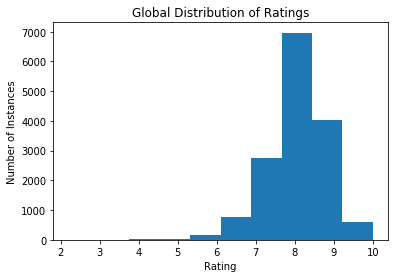

In [60]:
#histogram of global ratings dist.
plt.hist(imdb['Rating'], bins=10)
plt.title('Global Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Instances')
plt.show()

Going off an episode rating scale of (1-10), we can look at the histogram and see that our global episode ratings distribution is skewed right with a majority of ratings at approximately 8. Looking at the .describe() output, we can see that the minimum episode rating is 2.2.

### 8b.) What's the global average and median

Looking at the .describe() output, we can see that the global episode mean rating is 8.06, and the median is 8.1.

In [61]:
#mean
round(imdb['Rating'].mean(), 2)

8.06

In [62]:
#median
imdb['Rating'].median()

8.1

### 8c.) Based on the global average, which series has the greatest number of 'good' episodes

In [63]:
#filter df so that it only contains 'good' episodes (episodes with rating higher than global average)
gta = imdb[imdb['Rating'] > 8.06]
gta['Title'].value_counts()

Critical Role            204
Regular Show             188
Impractical Jokers       174
Friends                  171
South Park               147
                        ... 
Brass Eye                  3
North &amp; South          3
The Beatles: Get Back      3
QI                         1
Long Way Round             1
Name: Title, Length: 242, dtype: int64

In [64]:
#find total number of 'Critical Role' episodes in data set
imdb[imdb['Title'] == 'Critical Role'].shape

(332, 5)

In [65]:
#find percentage of Critical Role episodes that are 'good'
round(204/332,2)

0.61

While 'Critical Role' has the most "good" episodes of any series in this data, that is likely because of the high overall number of episodes in its entirety. Only 61% of the total episodes in 'Critical Role' were above the global episode average rating.

### 9.) Which series have the highest and lowest percentage of 'good' episodes?

In [66]:
#look at df with only 'good' episodes
gta

,Season,Episode,Rating,Code,Title
0,1,1,9.4,tt5491994,Planet Earth II
1,1,2,9.1,tt5491994,Planet Earth II
2,1,3,8.9,tt5491994,Planet Earth II
3,1,4,8.8,tt5491994,Planet Earth II
4,1,5,8.7,tt5491994,Planet Earth II
...,...,...,...,...,...
15297,12,9,8.5,tt1230180,The Angry Video Game Nerd
15301,13,4,8.2,tt1230180,The Angry Video Game Nerd
15308,13,11,8.2,tt1230180,The Angry Video Game Nerd
15335,16,2,8.3,tt1230180,The Angry Video Game Nerd


In [67]:
#total number of episodes for each series
imdb['Title'].value_counts()

The Simpsons                           733
Dragon Ball Z                          567
Critical Role                          332
South Park                             320
QI                                     307
                                      ... 
North &amp; South                        4
Rurouni Kenshin: Trust and Betrayal      4
Lonesome Dove                            4
The Defiant Ones                         4
The Beatles: Get Back                    3
Name: Title, Length: 243, dtype: int64

The first thing that stands out is that the length of this list is 243, but the length of gta is 242 (from question 8c), meaning that there
is one show in this data that didn't have ANY 'good' episodes.

In [68]:
#manually calculate proportion of 'good' episodes for a specific show
#total episodes
len(imdb[imdb['Title'] == 'The Office'])

202

In [69]:
#'good' episodes
len(imdb[(imdb['Title'] == 'The Office') & (imdb['Rating'] > 8.06)])

105

In [70]:
#percentage of 'good' episodes in The Office
round(105/202, 2)

0.52

In [71]:
#define distinct titles
###KEEPS order of titles as they are listed on imdb
t = imdb['Title'].unique()
t

array(['Planet Earth II', 'Chernobyl', 'Blue Planet II',
       'Band of Brothers', 'Cosmos: A Spacetime Odyssey', 'Planet Earth',
       'Cosmos', 'Our Planet', 'The World at War', 'The Last Dance',
       'Avatar: The Last Airbender', 'Life', 'Breaking Bad', 'The Wire',
       'The Vietnam War', 'Fullmetal Alchemist: Brotherhood',
       'Scam 1992: The Harshad Mehta Story', 'Arcane', 'The Blue Planet',
       'The Sopranos', 'Rick and Morty', 'Sherlock', 'Game of Thrones',
       'Firefly', 'Human Planet', 'Frozen Planet',
       'Batman: The Animated Series', 'Death Note', 'The Civil War',
       'The Beatles: Get Back', 'The Twilight Zone', 'True Detective',
       'Persona', 'Dekalog', 'Attack on Titan', "Clarkson's Farm",
       'Hunter x Hunter', 'When They See Us', 'Cowboy Bebop', 'Fargo',
       'Gravity Falls', 'TVF Pitchers', 'Better Call Saul',
       'Nathan for You', 'Apocalypse: The Second World War',
       'Only Fools and Horses', 'Africa', 'The Office', 'Das Boot',
 

In [72]:
#for each unique title, calculate proportion of 'good' episodes and store it in 'prop' variable
#also store the total number of episodes for each series in 'total_episodes' variable
prop = []
total_episodes = []
for i in t:
    prop.append((len(imdb[(imdb['Title'] == i) & (imdb['Rating'] > 8.06)]))/(len(imdb[imdb['Title'] == i])))
    total_episodes.append(len(imdb[imdb['Title'] == i]))
print(prop)
print(total_episodes)

[1.0, 1.0, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7741935483870968, 0.9090909090909091, 0.967741935483871, 0.95, 1.0, 0.703125, 1.0, 1.0, 0.75, 0.9418604651162791, 0.7368421052631579, 0.8, 0.9041095890410958, 1.0, 1.0, 0.7, 0.4, 0.5945945945945946, 1.0, 1.0, 0.23717948717948717, 0.75, 1.0, 0.6, 1.0, 1.0, 0.5067567567567568, 1.0, 0.6153846153846154, 0.6829268292682927, 0.7, 1.0, 0.9682539682539683, 0.875, 1.0, 0.6875, 1.0, 0.5198019801980198, 1.0, 1.0, 0.7514450867052023, 0.4, 1.0, 1.0, 1.0, 0.75, 0.9, 0.567741935483871, 0.45454545454545453, 0.9473684210526315, 0.7181818181818181, 0.7276595744680852, 0.5300751879699248, 0.8620689655172413, 0.4789915966386555, 0.30303030303030304, 1.0, 0.6493506493506493, 0.7777777777777778, 0.56, 0.8636363636363636, 0.7, 0.7727272727272727, 1.0, 0.8125, 0.9722222222222222, 1.0, 0.68, 0.746031746031746, 0.8928571428571429, 0.72, 0.9166666666666666, 0.75, 0.6428571428571429, 0.12522045855379188, 0.9117647058823529, 0.47368421052631576, 0.734177215189

In [73]:
#check to make sure loop worked properly
len(prop)

243

In [74]:
#create dictionary to use for dataframe and round prop values to 2 decimals
d = {'Title': t, 'total_episodes': total_episodes, 'prop_good': prop}
prop_df = pd.DataFrame(data=d)
prop_df['prop_good'] = round(prop_df['prop_good'],2)
prop_df.head()

,Title,total_episodes,prop_good
0,Planet Earth II,6,1.00
1,Chernobyl,5,1.00
2,Blue Planet II,8,0.88
3,Band of Brothers,10,1.00
4,Cosmos: A Spacetime Odyssey,13,1.00


In [75]:
#find the total number of shows with a 100% 'good' episode rate and sort by total episodes
pg = prop_df[prop_df['prop_good'] == 1.0].sort_values(by='total_episodes', ascending=False)
pg

,Title,total_episodes,prop_good
34,Attack on Titan,87,1.0
190,Ezel,71,1.0
124,Daredevil,39,1.0
143,Anne with an E,27,1.0
76,Dark,26,1.0
8,The World at War,26,1.0
117,Primal,20,1.0
172,Black Sun,20,1.0
53,Freaks and Geeks,18,1.0
94,Panchayat,16,1.0


In [76]:
#how many shows have only 'good' episodes
len(prop_df[prop_df['prop_good'] == 1.0].sort_values(by='total_episodes', ascending=False))

55

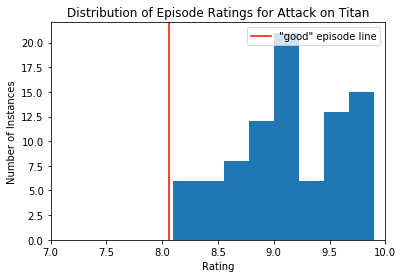

In [77]:
#plot distribution of episode rating and add in 'good' episode line to show how many 'good' episodes "Attack on Titan" has
a = imdb[imdb['Title'] == 'Attack on Titan']
plt.hist(a['Rating'], bins=8)
plt.title('Distribution of Episode Ratings for Attack on Titan')
plt.xlabel('Rating')
plt.ylabel('Number of Instances')
plt.xlim(7,10)
#plt.ylim(0,5)
#plt.axvline(x=8.6, color='black', label='Series Rating')
plt.axvline(x=8.06, color='red', label='"good" episode line')
plt.legend()
plt.show()

Based on this output, "Attack on Titan" is the show I need to consider. It has a 100% 'good' episode rate, and has more episodes than any other show with a 100% good episode rate. 55 shows have a 100% 'good' episode rate.

In [78]:
#find the total number of shows with a 0% 'good' episode rate
prop_df[prop_df['prop_good'] == 0].sort_values(by='total_episodes', ascending=False)

,Title,total_episodes,prop_good
175,QI,307,0.0
112,Mahabharat,94,0.0


Based on this output, we might think something went wrong because 2 shows appeared on this list when I had hypothesized only 1 earlier. This is because 'QI' actually has more than 0 'good' episodes, its just a very small number that, when rounded, produces a 0% 'good' episode rate. So 'Mahabharat' is truly the only show with absolutely no 'good' episodes.

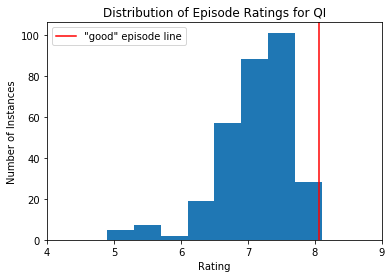

In [79]:
#plot distribution of episode rating and add in 'good' episode line to show how few 'good' episodes QI has
a = imdb[imdb['Title'] == 'QI']
plt.hist(a['Rating'], bins=8)
plt.title('Distribution of Episode Ratings for QI')
plt.xlabel('Rating')
plt.ylabel('Number of Instances')
plt.xlim(4,9)
plt.axvline(x=8.06, color='red', label='"good" episode line')
plt.legend()
plt.show()

In [80]:
#manual calculation for QI (should come out to < 0.05)
(len(imdb[(imdb['Title'] == 'QI') & (imdb['Rating'] > 8.06)]))/(len(imdb[imdb['Title'] == 'QI']))

0.003257328990228013

As you can see from this histogram and the manual calculation, "QI" has a 'good' episode rate of less than a half a percent. So there might be 1 good episode out there out of 307. Not a show you want to watch (except for maybe 1 random episode that is somehow good).

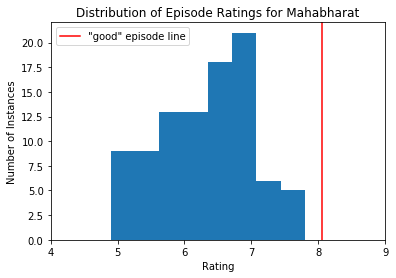

In [81]:
#plot distribution of episode rating and add in 'good' episode line to show how few 'good' episodes Mahabharat has
a = imdb[imdb['Title'] == 'Mahabharat']
plt.hist(a['Rating'], bins=8)
plt.title('Distribution of Episode Ratings for Mahabharat')
plt.xlabel('Rating')
plt.ylabel('Number of Instances')
plt.xlim(4,9)
plt.axvline(x=8.06, color='red', label='"good" episode line')
plt.legend()
plt.show()

Here we can see that Mahabharat contains exactly 0 'good' episodes. This is not a show that I am interested in starting.

### Global dataset EDA

Here we will introduce a new dataset that contains overall series ratings ('Rating') along with a count of how many series ratings were submitted ('Count'). Data also includes the show title and series code.

In [82]:
#load imdb_global csv into notebook
imdb_global = pd.read_csv('imdb_top_250_series_global_ratings.csv')
imdb_global.head()

,Title,Code,Rating,Rating Count
0,Planet Earth II,tt5491994,9.4,"144,570"
1,Breaking Bad,tt0903747,9.4,"1,857,606"
2,Planet Earth,tt0795176,9.4,"209,359"
3,Band of Brothers,tt0185906,9.4,"465,442"
4,Chernobyl,tt7366338,9.3,"742,477"


In [83]:
#check data types
imdb_global.dtypes

Title            object
Code             object
Rating          float64
Rating Count     object
dtype: object

In [84]:
#summary of numerical features
imdb_global.describe()

,Rating
count,250.000000
mean,8.651200
std,0.217919
min,8.400000
25%,8.500000
50%,8.600000
75%,8.700000
max,9.400000


In [85]:
#convert 'Rating Count' to float
imdb_global['Rating Count'] = imdb_global['Rating Count'].str.replace(',', '').astype(float)

In [86]:
#now 'Rating Count' is a numerical feature
imdb_global.describe()

,Rating,Rating Count
count,250.000000,2.500000e+02
mean,8.651200,1.501960e+05
std,0.217919,2.382084e+05
min,8.400000,1.026700e+04
25%,8.500000,2.968150e+04
50%,8.600000,6.812200e+04
75%,8.700000,1.574478e+05
max,9.400000,2.078524e+06


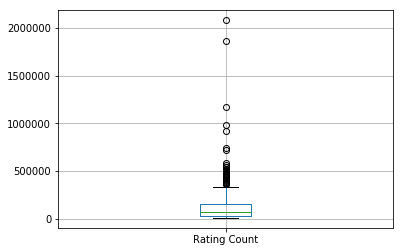

In [87]:
#Rating Count boxplot
imdb_global.boxplot(column='Rating Count')
plt.show()

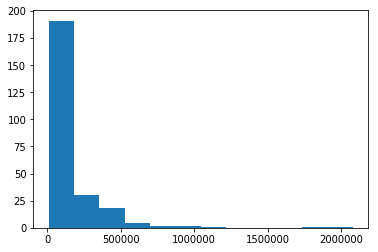

In [88]:
#Rating Count histogram
plt.hist(imdb_global['Rating Count'], bins=12)
plt.show()

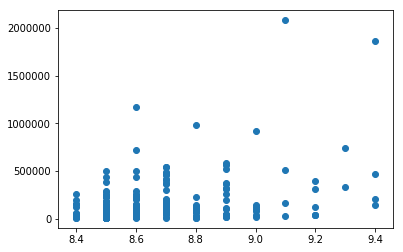

In [89]:
#plot Rating vs. Rating Count
plt.scatter('Rating', 'Rating Count', data=imdb_global)
#plt.title('Rating Counts')
#plt.xlabel()
#plt.ylabel()
plt.show()

## Global Dataset Questions

### 1.) What's the global distribution of series ratings?

In [90]:
#describe numerical variables (again)
imdb_global.describe()

,Rating,Rating Count
count,250.000000,2.500000e+02
mean,8.651200,1.501960e+05
std,0.217919,2.382084e+05
min,8.400000,1.026700e+04
25%,8.500000,2.968150e+04
50%,8.600000,6.812200e+04
75%,8.700000,1.574478e+05
max,9.400000,2.078524e+06


Looked at min and max from .describe() and determined that 11 bins was the correct number for looking at distribution hist

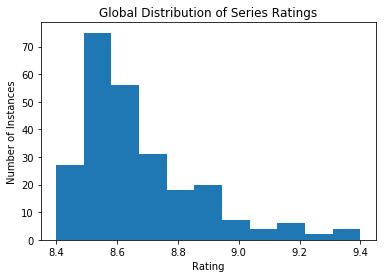

In [91]:
#plot global distribution of Series Ratings
plt.hist(imdb_global['Rating'], bins=11)
plt.title('Global Distribution of Series Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Instances')
plt.show()

All of the Global Series Ratings fall between 8.4 and 9.4. This makes sense when we consider that this is a dataset of IMDb's Top 250 TV Series, meaning that poorly rated series won't appear in this data.

### 2.) Which series have a higher gap between their Mean Episode Rating and their TV Series Rating?

In [92]:
#look at df w/ Mean Episode Rating
avg_rating.head()

,Title,Season,Episode,Rating
0,1883,1.000000,5.500000,8.600000
1,Adventure Time,5.125448,16.681004,8.015771
2,Africa,1.000000,3.500000,8.450000
3,Alfred Hitchcock Presents,3.988806,19.656716,7.134328
4,Anne with an E,2.111111,5.111111,8.744444


In [93]:
#look at global df
imdb_global.head()

,Title,Code,Rating,Rating Count
0,Planet Earth II,tt5491994,9.4,144570.0
1,Breaking Bad,tt0903747,9.4,1857606.0
2,Planet Earth,tt0795176,9.4,209359.0
3,Band of Brothers,tt0185906,9.4,465442.0
4,Chernobyl,tt7366338,9.3,742477.0


In [94]:
#dimensions
avg_rating.shape

(243, 4)

In [95]:
#dimensions
imdb_global.shape

(250, 4)

In [96]:
#number of unique titles
len(imdb['Title'].unique())

243

In [97]:
#number of unique titles
len(imdb_global['Title'].unique())

245

In [98]:
#lists of unique titles dont match up

In [99]:
#get distinct titles from each df
a = imdb['Title'].unique()
b = imdb_global['Title'].unique()

In [100]:
#filter imdb_global to contain only titles from list of distinct titles from imdb
similar = imdb_global[imdb_global['Title'].isin(a)]
len(similar['Title'].unique())

243

In [101]:
#now we are working with 2 dfs (avg_rating, similar) that contain the same values in 'Title'
similar.head()

,Title,Code,Rating,Rating Count
0,Planet Earth II,tt5491994,9.4,144570.0
1,Breaking Bad,tt0903747,9.4,1857606.0
2,Planet Earth,tt0795176,9.4,209359.0
3,Band of Brothers,tt0185906,9.4,465442.0
4,Chernobyl,tt7366338,9.3,742477.0


In [102]:
avg_rating.head()

,Title,Season,Episode,Rating
0,1883,1.000000,5.500000,8.600000
1,Adventure Time,5.125448,16.681004,8.015771
2,Africa,1.000000,3.500000,8.450000
3,Alfred Hitchcock Presents,3.988806,19.656716,7.134328
4,Anne with an E,2.111111,5.111111,8.744444


In [103]:
avg_rating.shape

(243, 4)

In [104]:
similar.shape

(248, 4)

In [105]:
#lists of unique titles match up, but df shapes don't match up so we need to drop duplicate entries in similar

In [106]:
#drop duplicate titles. Now we have dfs of equal shape, and with the same list of titles. Just need to to sort titles in similar
#so that we can simply subtract to find the difference between global series rating and mean episode rating
similar = similar.drop_duplicates(subset='Title')
similar.shape

(243, 4)

In [107]:
#sort titles in alphabetical order
similar = similar.sort_values(by='Title', ascending=True)
similar.head()

,Title,Code,Rating,Rating Count
113,1883,tt13991232,8.6,65379.0
147,Adventure Time,tt1305826,8.6,95052.0
50,Africa,tt2571774,8.8,16116.0
234,Alfred Hitchcock Presents,tt0047708,8.4,17524.0
152,Anne with an E,tt5421602,8.5,55040.0


In [108]:
#get relevant columns
similar = similar[['Title', 'Rating']]
similar

,Title,Rating
113,1883,8.6
147,Adventure Time,8.6
50,Africa,8.8
234,Alfred Hitchcock Presents,8.4
152,Anne with an E,8.5
...,...,...
144,Yellowstone,8.6
156,Yes Minister,8.5
185,"Yes, Prime Minister",8.5
138,Young Justice,8.6


In [109]:
#get relevant columns
avg_rating = avg_rating[['Title', 'Rating']]
avg_rating

,Title,Rating
0,1883,8.600000
1,Adventure Time,8.015771
2,Africa,8.450000
3,Alfred Hitchcock Presents,7.134328
4,Anne with an E,8.744444
...,...,...
238,Yellowstone,8.384615
239,Yes Minister,8.327273
240,"Yes, Prime Minister",8.418750
241,Young Justice,8.916327


In [110]:
#a quick scan of the dfs shows us that we have a matching list of titles and shapes, now we can calculate difference

In [111]:
#create dictionary, then create dataframe from dictionary
d = {'Title': avg_rating['Title'], 'Series Rating': similar['Rating'], 'Mean Episode Rating': avg_rating['Rating']}
gap = pd.DataFrame(data=d)
gap.head()

,Title,Series Rating,Mean Episode Rating
0,1883,9.4,8.600000
1,Adventure Time,9.4,8.015771
2,Africa,9.4,8.450000
3,Alfred Hitchcock Presents,9.4,7.134328
4,Anne with an E,9.3,8.744444


In [112]:
#didnt give me the right order of values for 'Series Rating', will try reindexing

In [113]:
#reset index
similar.reset_index(inplace=True)

In [114]:
#get relevant columns
similar = similar[['Title', 'Rating']]
similar.head()

,Title,Rating
0,1883,8.6
1,Adventure Time,8.6
2,Africa,8.8
3,Alfred Hitchcock Presents,8.4
4,Anne with an E,8.5


In [115]:
#re-indexing worked, everything is lined up now
#create dictionary, then create dataframe from dictionary
d = {'Title': avg_rating['Title'], 'Series Rating': similar['Rating'], 'Mean Episode Rating': round(avg_rating['Rating'],1)}
gap = pd.DataFrame(data=d)
gap.head()

,Title,Series Rating,Mean Episode Rating
0,1883,8.6,8.6
1,Adventure Time,8.6,8.0
2,Africa,8.8,8.5
3,Alfred Hitchcock Presents,8.4,7.1
4,Anne with an E,8.5,8.7


In [116]:
#create column for gap calculation. Here we are defining the difference in series rating and mean episode rating by:
#(series rating) - (mean episode rating)
gap['Gap'] = gap['Series Rating'] - gap['Mean Episode Rating']
gap.head()

,Title,Series Rating,Mean Episode Rating,Gap
0,1883,8.6,8.6,0.0
1,Adventure Time,8.6,8.0,0.6
2,Africa,8.8,8.5,0.3
3,Alfred Hitchcock Presents,8.4,7.1,1.3
4,Anne with an E,8.5,8.7,-0.2


In [117]:
#Top 5 and Bottom 5 results for 'Gap' variable
#sort values to see which series has the biggest discrepency
gap.sort_values(by='Gap', ascending=False)

,Title,Series Rating,Mean Episode Rating,Gap
119,Mahabharat,8.6,6.3,2.3
216,The Twilight Zone,9.0,7.5,1.5
213,The Simpsons,8.7,7.2,1.5
150,QI,8.5,7.1,1.4
3,Alfred Hitchcock Presents,8.4,7.1,1.3
...,...,...,...,...
88,Gullak,8.6,9.0,-0.4
152,Ramayan,8.6,9.0,-0.4
127,Mr. Robot,8.5,8.9,-0.4
231,Wentworth,8.4,8.8,-0.4


Based on this output, Mahabharat has the biggest difference between Series Rating and Mean Episode Rating. Specifically, the overall series rating was much higher than the mean episode rating.

Adversly, Aspiriants has the biggest difference in the opposite direction. Meaning that the Mean Episode Rating was higher than the Series Rating. Lets take a closer look at these series.

In [118]:
#Mahabharat description
imdb[imdb['Title'] == 'Mahabharat'].describe()

,Season,Episode,Rating
count,94.0,94.000000,94.000000
mean,1.0,47.500000,6.327660
std,0.0,27.279418,0.712923
min,1.0,1.000000,4.900000
25%,1.0,24.250000,5.800000
50%,1.0,47.500000,6.500000
75%,1.0,70.750000,6.800000
max,1.0,94.000000,7.800000


In [119]:
imdb_global[imdb_global['Title'] == 'Mahabharat']

,Title,Code,Rating,Rating Count
115,Mahabharat,tt0158417,8.6,19261.0


In [120]:
#imdb_global description
imdb_global.describe()

,Rating,Rating Count
count,250.000000,2.500000e+02
mean,8.651200,1.501960e+05
std,0.217919,2.382084e+05
min,8.400000,1.026700e+04
25%,8.500000,2.968150e+04
50%,8.600000,6.812200e+04
75%,8.700000,1.574478e+05
max,9.400000,2.078524e+06


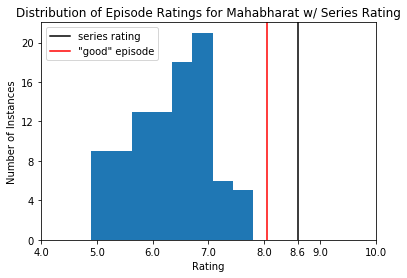

In [121]:
#plot distribution of episode rating and add in Series Rating to show that something isn't making sense
a = imdb[imdb['Title'] == 'Mahabharat']
plt.hist(a['Rating'], bins=8)
plt.title('Distribution of Episode Ratings for Mahabharat w/ Series Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Instances')
plt.xlim(4,10)
plt.axvline(x=8.6, color='black', label='series rating')
plt.axvline(x=8.06, color='red', label='"good" episode')
plt.xticks([4,5,6,7,8,8.6,9,10])#plot custom xticks
plt.yticks(np.arange(0,21,step=4))#plot yticks with step size
plt.legend()
plt.show()

Based on this summary of Mahabharat, the show had 1 season with 94 episodes, none of which would be considered 'good'. Therefore the Series Rating of 8.6 doesn't make much sense. The Rating Count for this show is relatively low, making it more susceptible to outliers.

In [122]:
#summary of Aspirants
imdb[imdb['Title'] == 'Aspirants']

,Season,Episode,Rating,Code,Title
6021,1,1,9.2,tt14392248,Aspirants
6022,1,2,9.3,tt14392248,Aspirants
6023,1,3,9.3,tt14392248,Aspirants
6024,1,4,9.5,tt14392248,Aspirants
6025,1,5,9.0,tt14392248,Aspirants


In [123]:
imdb_global[imdb_global['Title'] == 'Aspirants']

,Title,Code,Rating,Rating Count
121,Aspirants,tt14392248,8.6,296915.0


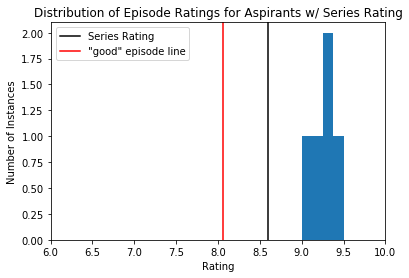

In [124]:
#plot distribution of episode rating and add in Series Rating to show that something isn't making sense
a = imdb[imdb['Title'] == 'Aspirants']
plt.hist(a['Rating'], bins=4)
plt.title('Distribution of Episode Ratings for Aspirants w/ Series Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Instances')
plt.xlim(6,10)
plt.axvline(x=8.6, color='black', label='Series Rating')
plt.axvline(x=8.06, color='red', label='"good" episode line')
plt.legend()
plt.show()

Based on this summary of Aspirants, the show was only 1 season with 5 episodes, all of which were rated very highly. The Rating Count was very high which wouldn't make it very susceptible to outliers. However, the overall lack of episodes could be contributing to the lower Series Rating. Also the series finale was the lowest rated episode relative to the rest so maybe viewers didn't like the way it ended, leading to a lower Series Rating.

In [125]:
#lets pick a few shows at random to see if the Global Series Rating falls with the distribution of episode ratings:
#The Office, The Simpsons, Game of Thrones

In [126]:
#The Office
gap[gap['Title'] == 'The Office']

,Title,Series Rating,Mean Episode Rating,Gap
208,The Office,8.9,8.1,0.8


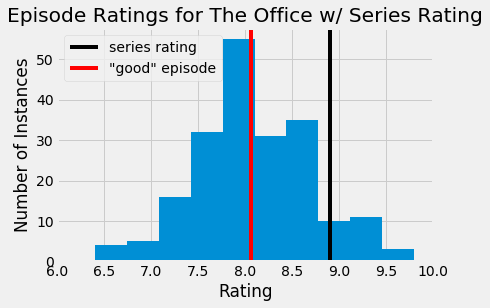

In [132]:
#plot distribution of episode rating and add in Series Rating
a = imdb[imdb['Title'] == 'The Office']
plt.hist(a['Rating'], bins=10)
plt.style.use('fivethirtyeight')#changes plot style for future plots
plt.title('Episode Ratings for The Office w/ Series Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Instances')
plt.xlim(6,10)
plt.axvline(x=8.9, color='black', label='series rating')
plt.axvline(x=8.06, color='red', label='"good" episode')
plt.legend()
plt.show()

In [128]:
#The Simpsons
gap[gap['Title'] == 'The Simpsons']

,Title,Series Rating,Mean Episode Rating,Gap
213,The Simpsons,8.7,7.2,1.5


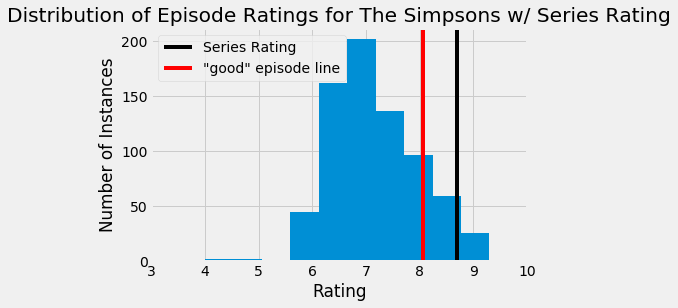

In [129]:
#plot distribution of episode rating and add in Series Rating
a = imdb[imdb['Title'] == 'The Simpsons']
plt.hist(a['Rating'], bins=10)
plt.title('Distribution of Episode Ratings for The Simpsons w/ Series Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Instances')
plt.xlim(3,10)
plt.axvline(x=8.7, color='black', label='Series Rating')
plt.axvline(x=8.06, color='red', label='"good" episode line')
plt.legend()
plt.show()

In [130]:
#Game of Thrones
gap[gap['Title'] == 'Game of Thrones']

,Title,Series Rating,Mean Episode Rating,Gap
83,Game of Thrones,9.1,8.7,0.4


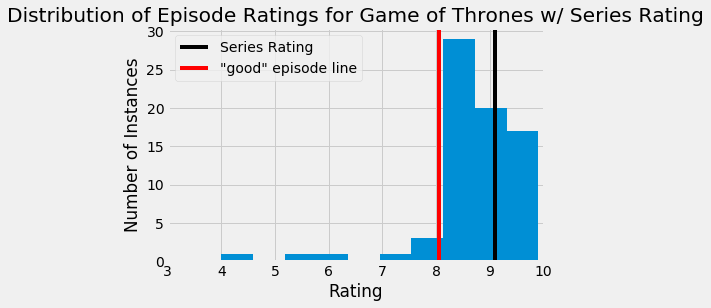

In [131]:
#plot distribution of episode rating and add in Series Rating
a = imdb[imdb['Title'] == 'Game of Thrones']
plt.hist(a['Rating'], bins=10)
plt.title('Distribution of Episode Ratings for Game of Thrones w/ Series Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Instances')
plt.xlim(3,10)
plt.axvline(x=9.1, color='black', label='Series Rating')
plt.axvline(x=8.06, color='red', label='"good" episode line')
plt.legend()
plt.show()

The 3 shows that I selected are all well established shows with at least 8 seasons. Based on these graphs I would say that while Mean Episode Rating and Series Rating are calculated independently. With more seasons, episodes, and ratings, the Series Rating will eventually fall within the distribution of episode ratings for Mahabharat and Aspirants. 

Would also like to pile on the Game of Thrones again. The graph above shows that the finale (Rating=4.0) is the worst episode in the entire series. Someone needs to pay for that horribleness.

### Conclusion

The characteristics of a show I would want to watch are as follows:
1. A large percentage of the episodes are 'good'
2. The next season is either better or as good as the previous season
3. The show ends on a high note with a highly rated Series Finale (very important, dont want another Game of Thrones situation)
4. More than 2 seasons

Based on the results from all the different questions I considered, the shows that fit this description the best are: 
1. Breaking Bad (97% 'good' episode rate, all seasons are 8.7 or higher, 9.9 Series Finale Rating, 5 seasons)
2. Better Call Saul (97% 'good' episode rate, all seasons 8.5 or higher, 9.8 Series Finale Rating, 6 seasons)
3. Attack on Titan (100% 'good' episode rate, all seasons 8.8 or higher, 9.7 Series Finale Rating, 4 seasons)
4. Succession (86% 'good' episode rate, rating gets better each season, 9.8 Series Finale Rating, 3 seasons)
5. BoJack Horseman (65% 'good' episode rate, rating gets better each season, 9.5 Series Finale Rating, 6 seasons)

I've already seen Breaking Bad and loved it, and I know Better Call Saul is a spin-off of that so I think I would like the subject matter. Attack on Titan probably has the best collection of statistics of any of the 5 shows that I listed above but I've never heard of it so I need to look and see if the subject matter is something that would interest me. I've heard of Succession but haven't seen it, but based on word of mouth I think I would enjoy that. I have also never heard of BoJack Horseman, so I need to look into that. But if the subject matter is something that I'm interested in, the tie-breaker will probably be what streaming platforms am I already subscribed to so that I don't have to drop any extra money. I know its cheap,  and not a very analytical conclusion to an analysis project, but I can always save the others for later.

Turns out that Attack on Titan is an anime show, and BoJack Horseman is an animated series, both of which I'm not really into at the moment (no shade though). And sense I don't currently have an HBO subscription to watch Succession, the winner is Better Call Saul! Now I get to relax and see if this analysis led me to the right show.